In [201]:
#first we run cellpose and outlines_list to get x,ys from cellpose
# second we run x_y_to_outlines to get x,ys from VGG-JSON 
# if the two arrays are identical, we know the transformation works --> cellpose, outlines_list part can be deleted.


import numpy as np
import pandas as pd
import time, os, sys
from urllib.parse import urlparse
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
mpl.rcParams['figure.dpi'] = 300
import cellpose
from cellpose import utils, io, models, plot
from cellpose.utils import outlines_list, masks_to_outlines
import os, sys
import glob
import cv2
from shapely.geometry import Polygon
import torch
import importlib
importlib.reload(models)
import csv
from pathlib import Path
import json

currentdir = os.path.dirname(os.path.realpath('cell_polygons.ipynb'))
parentdir = os.path.dirname(currentdir)
sys.path.append(parentdir)

In [202]:
#function to access first key of dictionary

def get_first_key(dictionary):
    for key in dictionary:
        return key
    raise IndexError

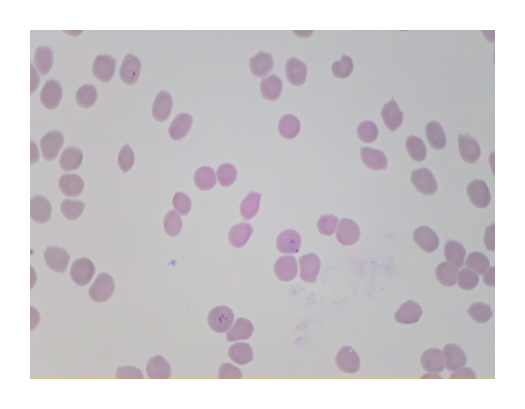

In [2]:
# cralws folder for files ending with .jpeg

def get_jpeg(path):
    list_jpeg = []
    # Delimiter
    for root, dirs, files in os.walk(path):
        for file in files:
            if file.endswith(".jpeg"):
                jpeg_path = os.path.join(root, file)
                list_jpeg.append(jpeg_path)
    return list_jpeg

org_files = get_jpeg('../data/scan_clean/vgg_test')
org_files

# view 1 image
img = io.imread(org_files[0])
plt.figure(figsize=(2,2))
plt.imshow(img)
plt.axis('off')
plt.show()

In [4]:
imgs = [cv2.imread(img_path) for img_path in org_files]

In [5]:
masks_all = []
img_len = len(imgs)
model = models.Cellpose(gpu=True, model_type='cyto')
chan = [0, 0] # for black and white imgs
diameter = 170

for i in range(img_len):
    masks, flows, styles, diams = model.eval(imgs[i], 
                                diameter= diameter, 
                                channels=chan,
                                invert = True,
                                flow_threshold = 1)
    masks_all.append(masks)

TORCH CUDA version not installed/working.
>>>> using CPU
Running test snippet to check if MKL-DNN working
see https://pytorch.org/docs/stable/backends.html?highlight=mkl
** MKL version working - CPU version is sped up. **
processing 1 image(s)
time spent: running network 108.38s; flow+mask computation 3.42
estimated masks for 1 image(s) in 112.72 sec
>>>> TOTAL TIME 112.72 sec
processing 1 image(s)
time spent: running network 64.57s; flow+mask computation 2.63
estimated masks for 1 image(s) in 69.33 sec
>>>> TOTAL TIME 69.34 sec
processing 1 image(s)
time spent: running network 57.29s; flow+mask computation 2.63
estimated masks for 1 image(s) in 61.45 sec
>>>> TOTAL TIME 61.45 sec
processing 1 image(s)
time spent: running network 81.53s; flow+mask computation 6.30
estimated masks for 1 image(s) in 99.32 sec
>>>> TOTAL TIME 99.32 sec


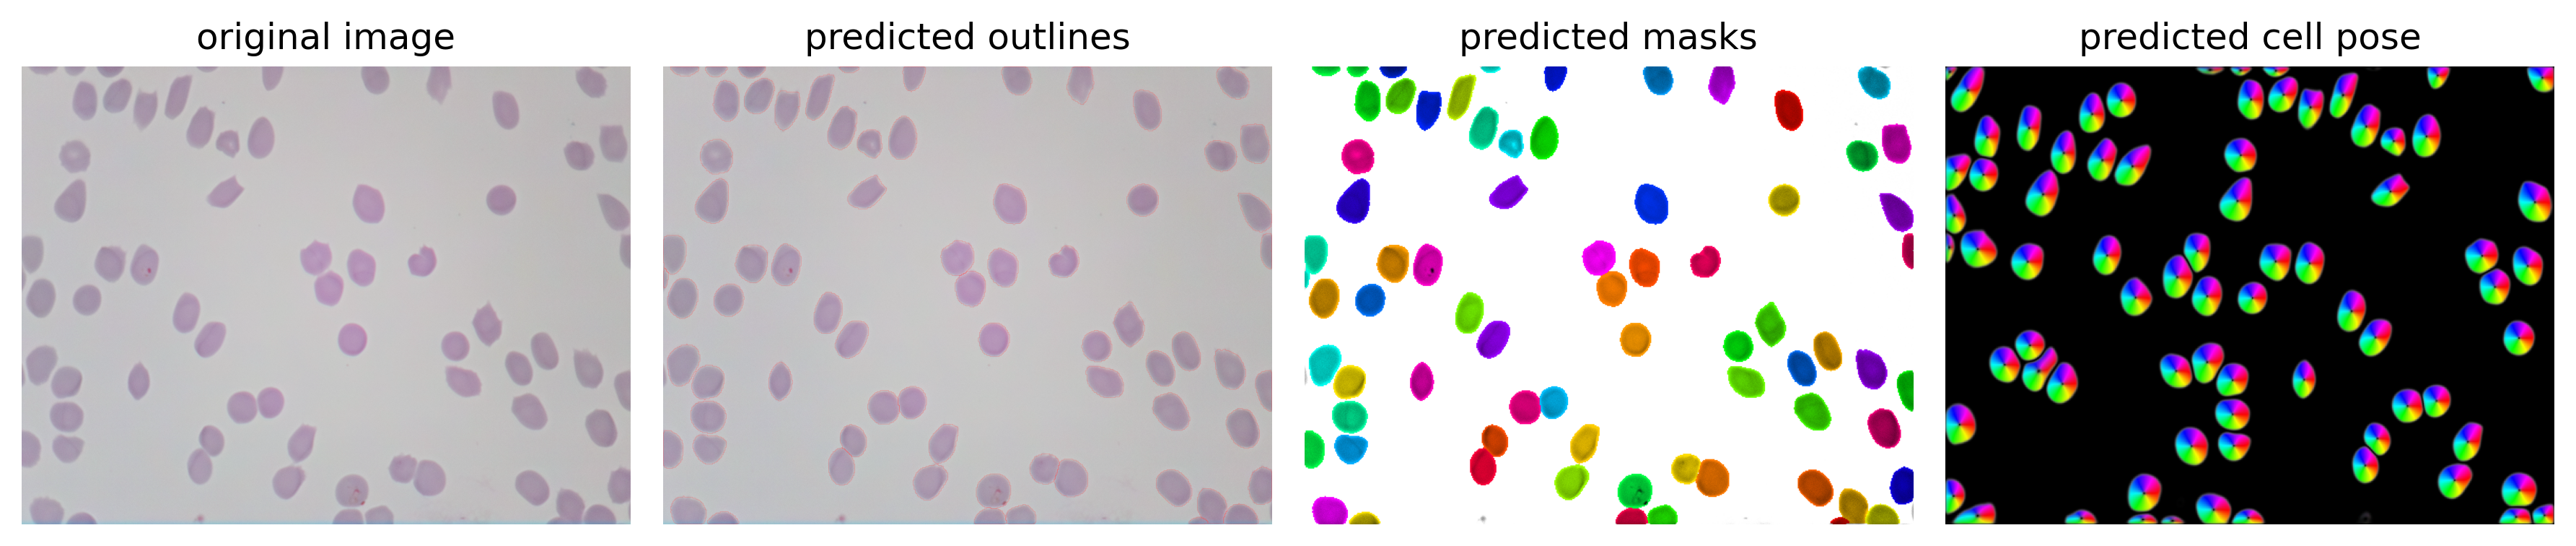

In [6]:
# quick test to check if for loop works and masks are correct

fig = plt.figure(figsize=(12,5))
plot.show_segmentation(fig, imgs[1], masks_all[1], flows[0], channels=chan)
plt.tight_layout()
plt.show()

In [203]:
#get outlines of first polygon of first image
outlines_0 = outlines_list(masks_all[0])

In [204]:
#read json
with open('../data/vgg_annotations/poly_annotations.json') as file:
    json_vgg_poly = json.load(file)

In [205]:
#function x_y_to_outlines returns x,ys of all images and polygons in a list of lists of [x,y]
def x_y_to_outlines(json_vgg_poly):
    first_key = get_first_key(json_vgg_poly)
    img_len = len(json_vgg_poly[first_key])
    img_arr = []
    for img in range(img_len): #img = 0-3
        poly_len = len(json_vgg_poly[first_key]['regions'])
        for poly in range(poly_len): # in case of img = 0, poly = 0-68
            poly_arr = []
            point_len = len(json_vgg_poly[first_key]['regions'][poly]['shape_attributes']['all_points_x'])
            for point in range(point_len): # in case of poly = 0, point = 0 - 404
                x_y_arr = []
                x_y_arr.append(json_vgg_poly[first_key]['regions'][poly]['shape_attributes']['all_points_x'][point])
                x_y_arr.append(json_vgg_poly[first_key]['regions'][poly]['shape_attributes']['all_points_y'][point])
                poly_arr.append(x_y_arr)
                img_arr.append(poly_arr)
    return img_arr

In [223]:
#call function x_y_to_outlines and display first list. --> should return the same list as outlines_0[0]
list_vgg = x_y_to_outlines(json_vgg_poly)[0]

In [224]:
#display outlines of first polygon of first image. --> should return the same list as x_y_to_outlines(json_vgg_poly)[0]
list_cellpose = outlines_0[0]

In [225]:
#this simple test tells us the lists should be identical, but I'm not 100% sure if it's the case for the whole list of lists

if ((len(list_vgg) == len(list2)) and
   (all(i in list2 for i in list1))):
    print('True')
else:
    print('False')

True
